In [1]:
import kdsource.histograms as kds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

hs = kds.HistogramSource(
    trackfile="/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5",
    particle_type="neutron",
    z0=0,
    Nparticles=1e10,
    surface_geometry='circular',
    R=5,
    domain={"w": [0, 20]},
)
hs.configure_binning(
    variable_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[60] * 5,
    macro_bins=[7, 10, 6, 5],
    micro_binning="adaptive",
    macro_binning="adaptive",
)
hs.build_tree()
hs.write_xml(output="source.xml")


[DEBUG] Creando SurfaceSourceFile con domain={'w': [0, 20], 'type': [2112, None]}
[DEBUG] Σwgt=2.218e+04 | N=10000000000 | J=2.218e-06
[DEBUG] Binning configurado → {'order': ['ln(E0/E)', 'x', 'y', 'mu', 'phi'], 'micro': [60, 60, 60, 60, 60], 'macro': [7, 10, 6, 5], 'micro_binning': 'adaptive', 'macro_binning': 'adaptive', 'user': [None, None, None, None, None]}


Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5: 45840
100% n, 0% g, 0% e-, 0% e+, 0% p, 


[DEBUG] Árbol construido con éxito. Root=TreeNode(n_children=7)
[INFO] XML guardado → source.xml


In [2]:
hs.generate_mcpl(
    n_particles=15000000,
    write_path="mcpl_test.mcpl",
    overwrite=True,
)

[INFO] Ejecutando: kdtool resample -o /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/prueba_funcionamiento/mcpl_test.mcpl -n 15000000 -m 2 /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/prueba_funcionamiento/source.xml


KDSource resample tool
flag1
Resampling from histograms...
Header loaded successfully
Variables = 5 | z0 = 0.000 cm | J = 2.218e-06 1/s
 | Geometry = circular
Particula 100000
Particula 200000
Particula 300000
Particula 400000
Particula 500000
Particula 600000
Particula 700000
Particula 800000
Particula 900000
Particula 1000000
Particula 1100000
Particula 1200000
Particula 1300000
Particula 1400000
Particula 1500000
Particula 1600000
Particula 1700000
Particula 1800000
Particula 1900000
Particula 2000000
Particula 2100000
Particula 2200000
Particula 2300000
Particula 2400000
Particula 2500000
Particula 2600000
Particula 2700000
Particula 2800000
Particula 2900000
Particula 3000000
Particula 3100000
Particula 3200000
Particula 3300000
Particula 3400000
Particula 3500000
Particula 3600000
Particula 3700000
Particula 3800000
Particula 3900000
Particula 4000000
Particula 4100000
Particula 4200000
Particula 4300000
Particula 4400000
Particula 4500000
Particula 4600000
Particula 4700000
Part

[INFO] MCPL generado → /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/prueba_funcionamiento/mcpl_test.mcpl


MCPL: Succesfully compressed file into mcpl_test.mcpl.gz
Successfully sampled 15000000 particles.


PosixPath('/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/prueba_funcionamiento/mcpl_test.mcpl')

In [3]:
import kdsource.surfsource as kds

ss = kds.SurfaceSourceFile(
    '/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/prueba_funcionamiento/mcpl_test.mcpl.gz',
)


Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/prueba_funcionamiento/mcpl_test.mcpl.gz: 15000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 


Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5: 45840
100% n, 0% g, 0% e-, 0% e+, 0% p, 


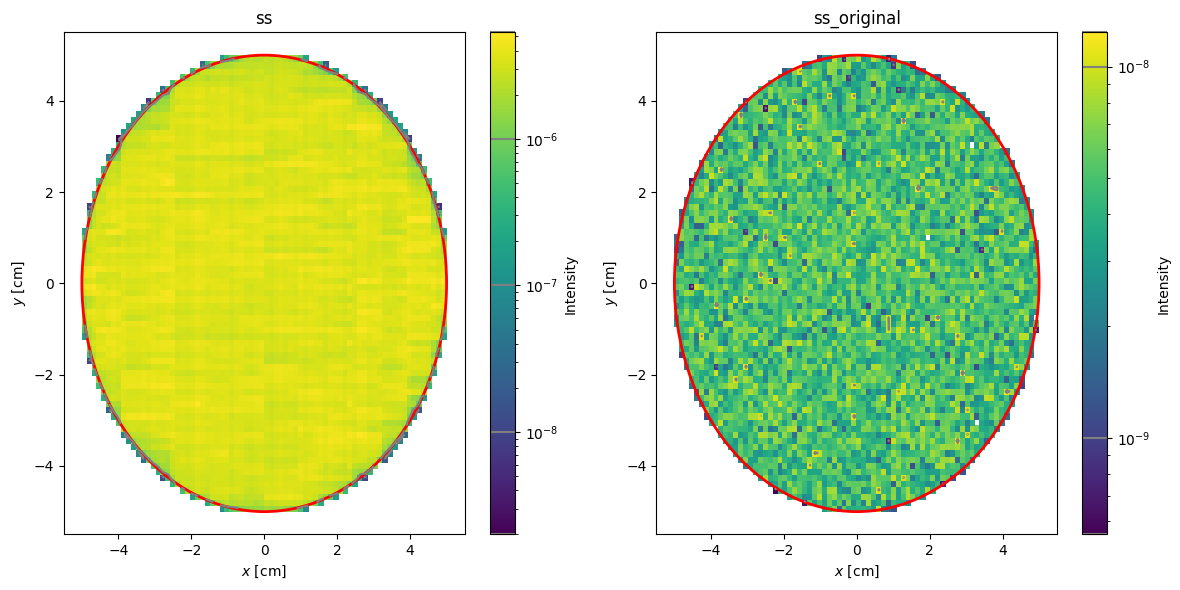

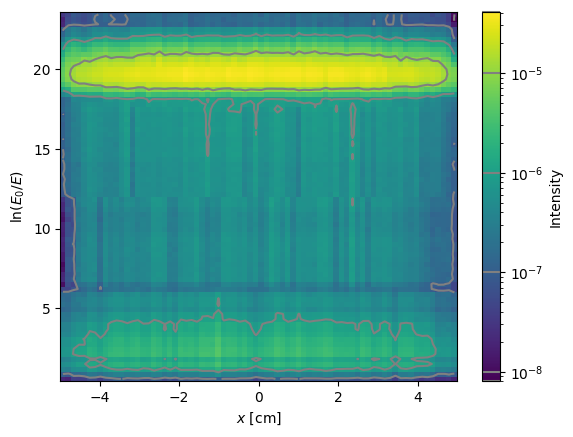

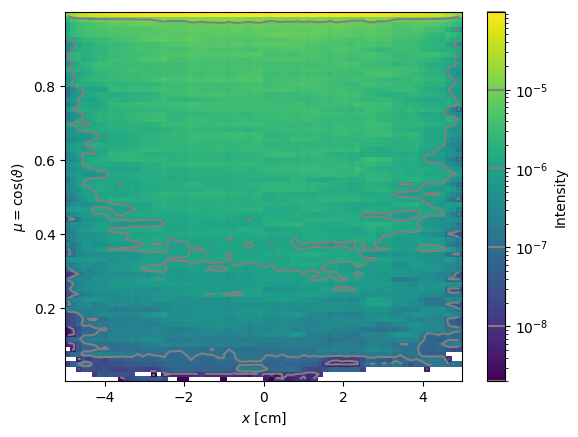

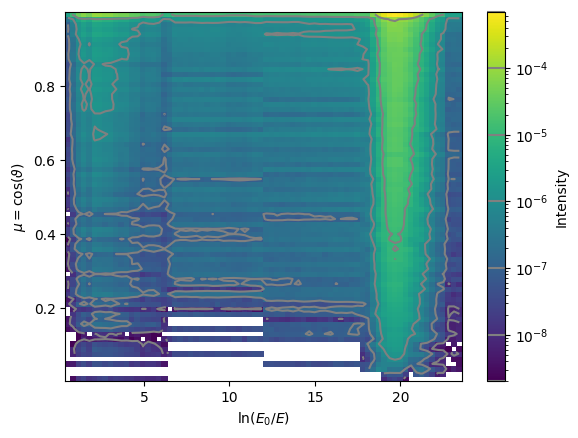

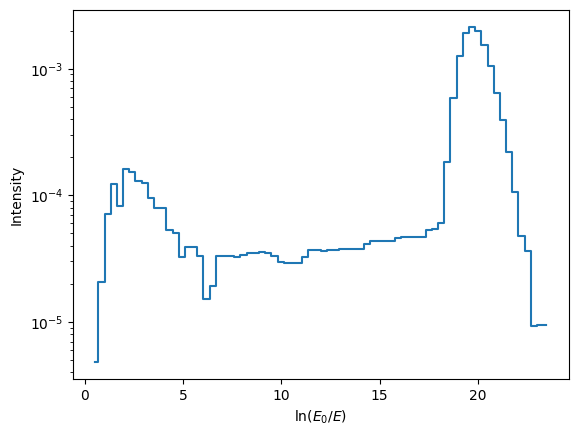

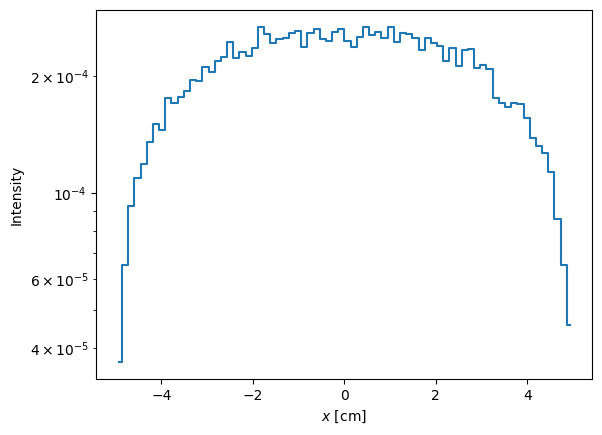

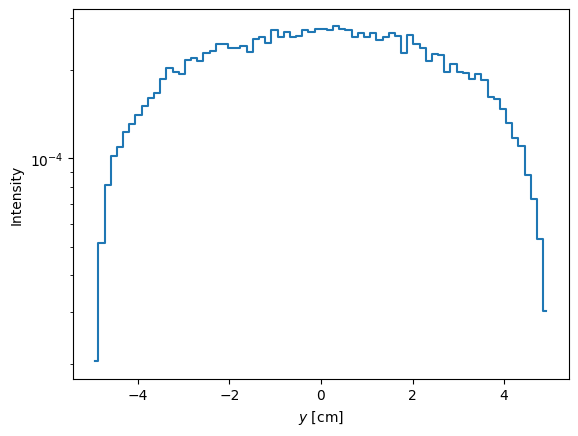

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [4]:
bins = 75

ss_original = kds.SurfaceSourceFile(
    '/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5',
    domain={"w": [0, 2]},
)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# first subplot: ss
plt.sca(axes[0])
ss.plot_distribution(
    vars=["x", "y"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
circle = plt.Circle((0, 0), 5, fill=False, edgecolor="red", linewidth=2)
axes[0].add_patch(circle)
axes[0].set_title("ss")

# second subplot: ss_original
plt.sca(axes[1])
ss_original.plot_distribution(
    vars=["x", "y"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
circle = plt.Circle((0, 0), 5, fill=False, edgecolor="red", linewidth=2)
axes[1].add_patch(circle)
axes[1].set_title("ss_original")

plt.tight_layout()
plt.show()

plt.figure()
ss.plot_distribution(
    vars=["x", "ln(E0/E)"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
plt.show()

plt.figure()
ss.plot_distribution(
    vars=["x", "mu"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
plt.show()

plt.figure()
ss.plot_distribution(
    vars=["ln(E0/E)", "mu"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
plt.show()

plt.figure()
ss.plot_distribution(
    vars=["ln(E0/E)"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.show()

plt.figure()
ss.plot_distribution(
    vars=["x"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.show()

plt.figure()
ss.plot_distribution(
    vars=["y"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.show()

plt.figure()
ss.plot_distribution(
    vars=["mu"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.show()

# plt.figure()
# ss.plot_distribution(
#     vars=["phi"],
#     bins=[201],
#     scales=["linear","log"],
# )
# plt.show()